# Decision Trees and Encoding
### Data Mining HW2 3/20/2022

This homework assignment explores classification with decision trees. Below is a grid with categories labeled A, B and C. How should we classify these?

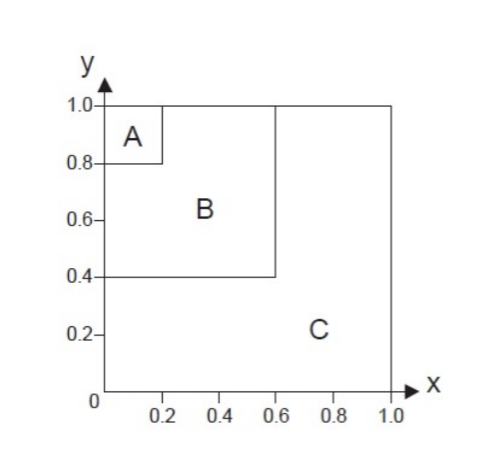

Lets first draw a line along the bottom of A and the side of A, this will separate the A data from everything else. Then lets draw a line along the bottom of B and the side of B. Now we have isolated the B category. Everything else is C. 

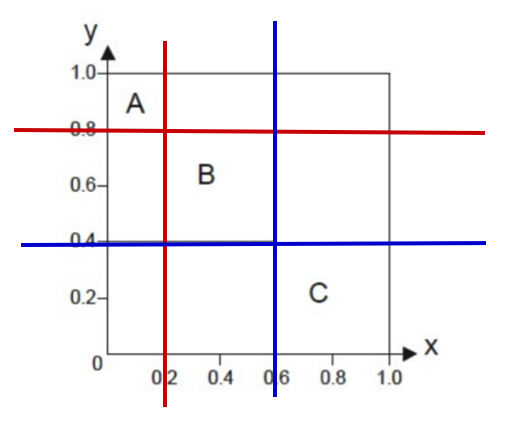

Below we have a training set for predicting lung cancer, the target. We want to draw a two level decision tree with entropy as the impurity measure. Lets compute the information gain for the candidate attributes at the first and second levels, and then compute the training error of the decision tree.

The mathematical formula for entropy is: 
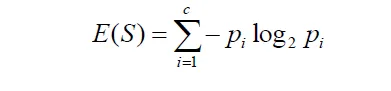

To calculate, we select "no" for the target according to class, for each feature. For instance, for Tobacco Smoking, 1 no out of five for the yes class of the target. For the no class, we have four nos for tobacco smoking. Plugging this into the equation, we get: 1/5*log2(1/5) - 4/5*log2(4/5) = -.21

Extrapolating to the other features gives us the following entropy:
Tobacco: -.21
Radon Exposure: -.44
Chronic Cough: .064
Weight Loss: .09

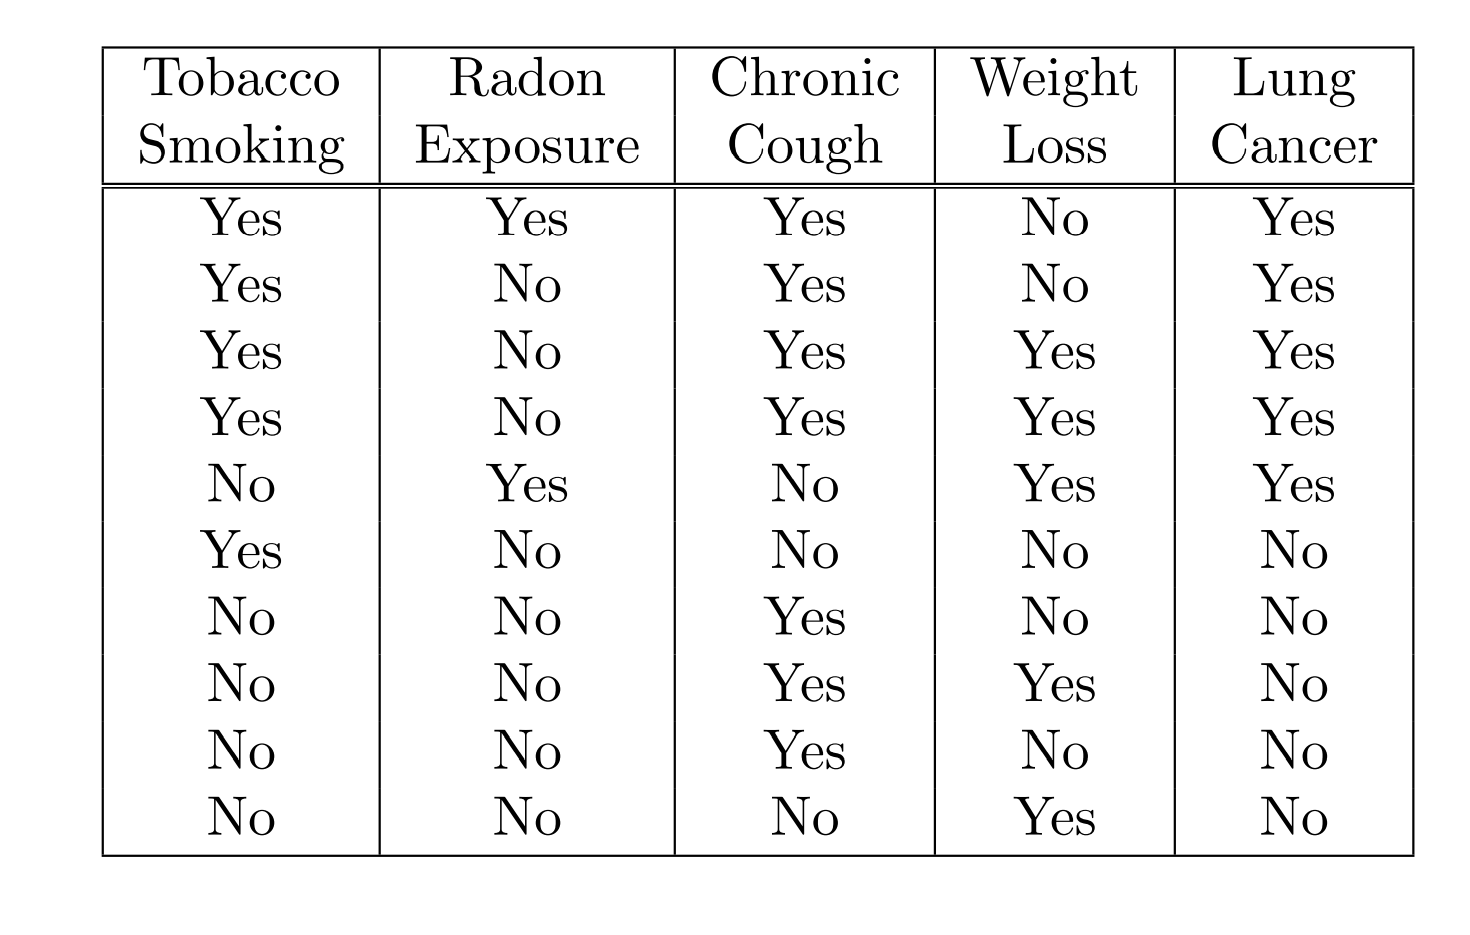

Now lets explore the bank note dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/Users/liamsweeney/Downloads/bankingLoans.csv')

In [2]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [13]:
df.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
Personal Loan         5000
dtype: int64

In [14]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

Lets drop zip code and ID, because they are not likely to make a difference in whether or not a loan is given.

In [24]:
df.drop("ZIP Code", axis = 1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,1,0,0


In [27]:
df.drop("ID", axis = 1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


Now lets separate the target from the features.

In [32]:
X = df.drop("Personal Loan", axis = 1)
y = df[['Personal Loan']]

Looking at the target we see that loans are approved about one tenth of the time. 

In [45]:
y.value_counts()

Personal Loan
0                4520
1                 480
dtype: int64

Now lets separate the training data and the test data and make a decision tree.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=100)

In [49]:
from sklearn import tree


In [51]:
loan_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
loan_tree = loan_tree.fit(X, y)

[Text(0.4230769230769231, 0.875, 'X[3] <= 98.5\nentropy = 0.456\nsamples = 5000\nvalue = [4520, 480]'),
 Text(0.15384615384615385, 0.625, 'X[6] <= 2.95\nentropy = 0.078\nsamples = 3754\nvalue = [3718, 36]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 3544\nvalue = [3544, 0]'),
 Text(0.23076923076923078, 0.375, 'X[10] <= 0.5\nentropy = 0.661\nsamples = 210\nvalue = [174, 36]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.538\nsamples = 195\nvalue = [171, 24]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.722\nsamples = 15\nvalue = [3, 12]'),
 Text(0.6923076923076923, 0.625, 'X[7] <= 1.5\nentropy = 0.94\nsamples = 1246\nvalue = [802, 444]'),
 Text(0.5384615384615384, 0.375, 'X[5] <= 2.5\nentropy = 0.488\nsamples = 764\nvalue = [683, 81]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.064\nsamples = 668\nvalue = [663, 5]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.738\nsamples = 96\nvalue = [20, 76]'),
 Text(0.8461538461538461, 0.375, 'X[3] <= 116.5\nentropy =

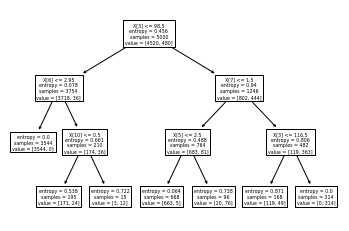

In [62]:
tree.plot_tree(loan_tree)

Now lets turn to the voting dataset. The target is Class Name, classes are republican and democrat. Missing data has a question mark. 

In [63]:
votes = pd.read_csv("/Users/liamsweeney/Downloads/archive/house-votes-84.csv")

In [64]:
votes.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [66]:
votes.columns

Index(['Class Name', ' handicapped-infants', ' water-project-cost-sharing',
       ' adoption-of-the-budget-resolution', ' physician-fee-freeze',
       ' el-salvador-aid', ' religious-groups-in-schools',
       ' anti-satellite-test-ban', ' aid-to-nicaraguan-contras', ' mx-missile',
       ' immigration', ' synfuels-corporation-cutback', ' education-spending',
       ' superfund-right-to-sue', ' crime', ' duty-free-exports',
       ' export-administration-act-south-africa'],
      dtype='object')

Lets see how many question marks we're dealing with. I checked a few different columns. 

In [82]:
votes[' physician-fee-freeze'].value_counts()

n    247
y    177
?     11
Name:  physician-fee-freeze, dtype: int64

Now lets replace the question mark with zero

In [88]:
votes = votes.replace('?', 0)

In [89]:
X = votes.drop('Class Name', axis = 1)
y = votes[['Class Name']]

In [90]:
X.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,0,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,0
2,0,y,y,0,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,0,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,0,y,y,y,y


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=100)

In [94]:
ore = ce.OrdinalEncoder()

In [97]:
X = ore.fit_transform(X)

In [98]:
vote_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
vote_tree = vote_tree.fit(X, y)

[Text(0.5, 0.875, 'X[3] <= 1.5\nentropy = 0.962\nsamples = 435\nvalue = [267, 168]'),
 Text(0.25, 0.625, 'X[10] <= 2.5\nentropy = 0.399\nsamples = 177\nvalue = [14, 163]'),
 Text(0.125, 0.375, 'X[9] <= 1.5\nentropy = 0.145\nsamples = 145\nvalue = [3, 142]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 80\nvalue = [0, 80]'),
 Text(0.1875, 0.125, 'entropy = 0.27\nsamples = 65\nvalue = [3, 62]'),
 Text(0.375, 0.375, 'X[2] <= 1.5\nentropy = 0.928\nsamples = 32\nvalue = [11, 21]'),
 Text(0.3125, 0.125, 'entropy = 0.755\nsamples = 23\nvalue = [5, 18]'),
 Text(0.4375, 0.125, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.75, 0.625, 'X[2] <= 2.5\nentropy = 0.138\nsamples = 258\nvalue = [253, 5]'),
 Text(0.625, 0.375, 'X[2] <= 1.5\nentropy = 0.067\nsamples = 249\nvalue = [247, 2]'),
 Text(0.5625, 0.125, 'entropy = 0.402\nsamples = 25\nvalue = [23, 2]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(0.875, 0.375, 'X[8] <= 2.5\nentropy = 0.918\nsamples

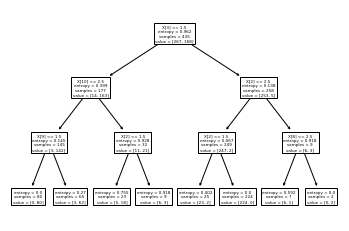

In [101]:
tree.plot_tree(vote_tree)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(votes[["body_style"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

In [ ]:
import category_encoders as ce